<a href="https://www.kaggle.com/code/zrosen3/titanicsubmissionrosen?scriptVersionId=95170522" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Below, I input the training and test data and take a first look at the data.

In [1]:
##data processing
#load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#load in training data
train = pd.read_csv("/kaggle/input/titanic/train.csv")
#load in test data
test = pd.read_csv("/kaggle/input/titanic/test.csv")
#list of training and test data
combined_data = pd.concat([train, test]).reset_index(drop = True) 

Looking at the type of each variable

In [2]:
combined_data.dtypes


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Creat boxplots of numeric values

<AxesSubplot:xlabel='Age'>

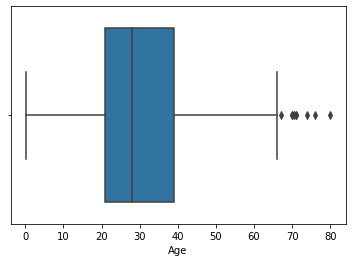

In [3]:
import seaborn as sns
sns.boxplot(x= combined_data['Age'])


<AxesSubplot:xlabel='Fare'>

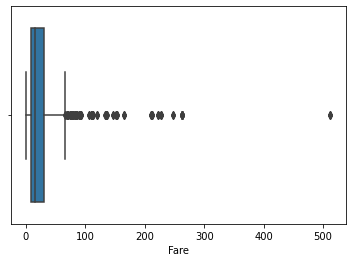

In [4]:
sns.boxplot(x= combined_data['Fare'])

<AxesSubplot:xlabel='SibSp'>

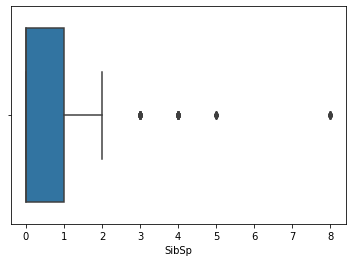

In [5]:
sns.boxplot(x= combined_data['SibSp'])

<AxesSubplot:xlabel='Parch'>

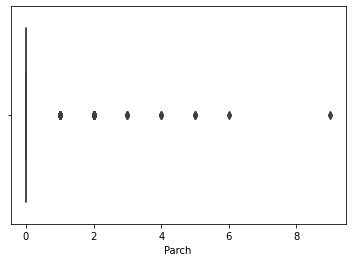

In [6]:
sns.boxplot(x= combined_data['Parch'])

Get summary statistics and missing values for all columns.

In [7]:
combined_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Look at how many null values in each column.

In [8]:
combined_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Age and cabin have a lot of missing values. Cabin is mostly missing values. 

Embarked has only a few missing values, so replace with most common value S.

In [9]:
combined_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [10]:
combined_data['Embarked'] =combined_data['Embarked'].fillna('S')

Create variable for family size, title, and is alone

In [11]:

#create variable for title, lsat name
common_titles = ['Mr', 'Mrs', 'Miss', 'Master']
combined_data['Family_Name'] = combined_data['Name'].str.split(', ', expand=True)[0]
combined_data['Temp'] = combined_data['Name'].str.split(', ', expand=True)[1]
combined_data['Title'] = combined_data['Temp'].str.split('.', expand = True)[0]
combined_data['Title'] = combined_data['Title'].replace('Mlle', 'Miss')
combined_data['Title'] = combined_data['Title'].replace('Ms', 'Miss')
combined_data['Title'] = combined_data['Title'].replace('Mme', 'Mrs')
combined_data.loc[~combined_data['Title'].isin(common_titles), "Title"] = "Other"


In [12]:
combined_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
Family_Name       0
Temp              0
Title             0
dtype: int64

In [13]:
combined_data['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Other      29
Name: Title, dtype: int64

Look to see if cabin being non missing has some correlation to survived.

   CabinMissing  Survived
0             0  0.666667
1             1  0.299854


<AxesSubplot:xlabel='CabinMissing'>

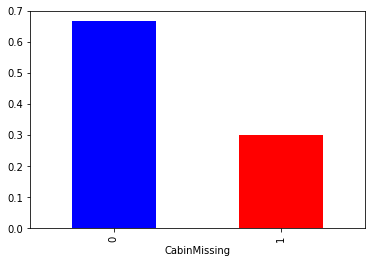

In [14]:
combined_data['CabinMissing'] = 0
combined_data.loc[combined_data['Cabin'].isnull(), 'CabinMissing'] = 1
print(combined_data.groupby(['CabinMissing'], as_index = False)['Survived'].mean())
combined_data.groupby(["CabinMissing"])["Survived"].mean().plot.bar(color = ['b', 'r'])

Whether cabin or not is missing seems to be related to survival. Passengers with missing cabin less likely to survive. Cabin data contains information on decks. See if deck related to survival

Missing    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: Deck, dtype: int64
      Deck  Survived
0        A  0.466667
1        B  0.744681
2        C  0.593220
3        D  0.757576
4        E  0.750000
5        F  0.615385
6        G  0.500000
7  Missing  0.299854
8        T  0.000000


<AxesSubplot:xlabel='Deck'>

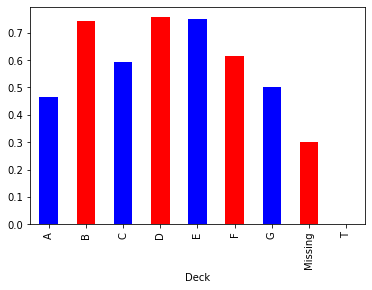

In [15]:
combined_data["Deck"] = combined_data["Cabin"].str.slice(stop=1)
combined_data["Deck"]= combined_data["Deck"].replace(np.nan, "Missing")
print(combined_data["Deck"].value_counts())
print(combined_data.groupby(['Deck'], as_index = False)['Survived'].mean())
combined_data.groupby(["Deck"])["Survived"].mean().plot.bar(color = ['b', 'r'])

There may be some variation between decks, but the most striking variation seems to be between whether the deck is missing or not.

Creat variable for family size from siblings and parents

<AxesSubplot:xlabel='FamilySize'>

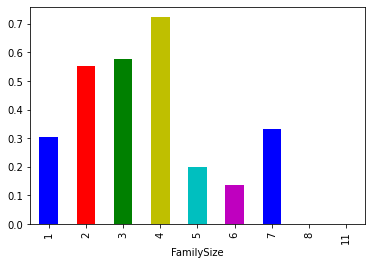

In [16]:
#create variable for family size
combined_data["FamilySize"] = combined_data["SibSp"] + combined_data["Parch"]+1
combined_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=False)
combined_data.groupby(["FamilySize"])["Survived"].mean().plot.bar(color= ["b", "r", "g", "y", "c", "m"])

Meaningful variation seems to be found from grouping family size into groups 1, 2-4, and 5-11. However, very few observations in groups 4-10, so low survival rates may be noise. Just split into groups of passengers with family members and without.

1    790
0    519
Name: Alone, dtype: int64
   Alone  Survived
1      1  0.303538
0      0  0.505650


<AxesSubplot:xlabel='Alone'>

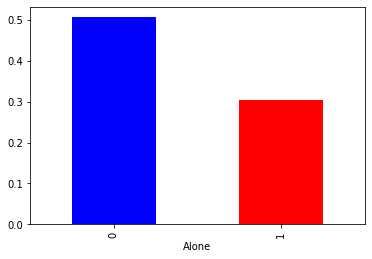

In [17]:
combined_data['Alone'] = 0
combined_data.loc[combined_data['FamilySize'] == 1,'Alone'] = 1
print(combined_data["Alone"].value_counts())
print(combined_data.groupby(['Alone'], as_index = False)["Survived"].mean().sort_values(by='Alone', ascending=False))
combined_data.groupby(["Alone"])["Survived"].mean().plot.bar(color = ['b', 'r'])

Passengers seem much more likely to survive when they have family members compared to when they are alone.

Split into training and test datasets

In [18]:
train_data = combined_data.iloc[:len(train)].copy()
test_data = combined_data.iloc[len(train):].copy()

Use linear regression to predict missing values for fare. 

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

#replace 0s with missings
train_data['Fare'] = train_data['Fare'].replace(0, np.nan)
test_data['Fare'] = test_data["Fare"].replace(0, np.nan)

#find missing rows in dataframe
non_missing_fares = train_data[train_data["Fare"].notnull()]
missing_train_fares = train_data[train_data["Fare"].isnull()]
missing_test_fares = test_data[test_data["Fare"].isnull()]
missing_fares = pd.concat([missing_train_fares, missing_test_fares])

#initialize model
features = ["Pclass", "Sex", "FamilySize"]
model = LinearRegression()
X = pd.get_dummies(non_missing_fares[features])
X_test = pd.get_dummies(missing_fares[features])
X_test["Sex_female"] = 0
y = non_missing_fares['Fare'].astype("int")
model.fit(X, y) 

#run model, look at performance
predictions = model.predict(X_test)
r_sq = model.score(X,y)
intercept = model.intercept_
coeffs = model.coef_
print("R squared:" + str(r_sq))
print("Intercepts:" + str(intercept) )
print("Coeffcients:" + str(coeffs))

R squared:0.38008480334153016
Intercepts:97.92213370402702
Coeffcients:[-34.09609364   7.32971009   2.58259515  -2.58259515]


In [20]:
missing_fares["Predicted_Fare"] = predictions
missing_fares = missing_fares[["Pclass", "Sex", "FamilySize", "Predicted_Fare"]].drop_duplicates()
train_data = train_data.merge(missing_fares, how = "left", on = ['Pclass', 'Sex', 'FamilySize'])
train_data['Fare'] = train_data['Fare'].fillna(train_data["Predicted_Fare"])
test_data = test_data.merge(missing_fares, how = "left", on = ['Pclass', 'Sex', 'FamilySize'])
test_data['Fare'] = test_data['Fare'].fillna(test_data["Predicted_Fare"])

Look if age varies with Pclass and sex

In [21]:
train_data.groupby(['Pclass'])['Age'].mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Look at distribution of age for pclass and sex groups.

In [22]:
train_data.groupby(['Sex', 'Pclass'])['Age'].mean()


Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

Impute missing age values using linear regression.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


#find missing rows in dataframe
non_missing_ages = train_data[train_data["Age"].notnull()]
missing_train = train_data[train_data["Age"].isnull()]
missing_test = test_data[test_data["Age"].isnull()]
missing_ages = pd.concat([missing_train, missing_test])

#initialize model
features = ["Pclass", "Sex", "FamilySize"]
model = LinearRegression()
X = pd.get_dummies(non_missing_ages[features])
X_test = pd.get_dummies(missing_ages[features])
y = non_missing_ages['Age'].astype("int")
model.fit(X, y) 

#run model, look at performance
predictions = model.predict(X_test)
r_sq = model.score(X,y)
intercept = model.intercept_
coeffs = model.coef_
print("R squared:" + str(r_sq))
print("Intercepts:" + str(intercept) )
print("Coeffcients:" + str(coeffs))

R squared:0.22419311101772643
Intercepts:48.591798831030694
Coeffcients:[-6.40857033 -2.55583777 -1.45023577  1.45023577]


Add predicted age value onto each dataset

In [24]:
missing_ages["Predicted_Age"] = predictions
missing_ages = missing_ages[["Pclass", "Sex", "FamilySize", "Predicted_Age"]].drop_duplicates()
train_data = train_data.merge(missing_ages, how = "left", on = ['Pclass', 'Sex', 'FamilySize'])
train_data['Age'] = train_data['Age'].fillna(train_data["Predicted_Age"])
test_data = test_data.merge(missing_ages, how = "left", on = ['Pclass', 'Sex', 'FamilySize'])
test_data['Age'] = test_data['Age'].fillna(test_data["Predicted_Age"])

Create family survival rate variable

In [25]:
#baseline survival rate is actual titanic survival rate
baseline = (2224-1502)/2224
#calculate family survival rate for train data, only count family sizes not 0
train_data["Family_Survival"] = train_data.groupby("Family_Name")["Survived"].transform('mean')
train_data.loc[train_data["Alone"] == 1, "Family_Survival"] = baseline
#calculate family survival rate for test data
family_rates_grouped = train_data.groupby("Family_Name")["Survived"].mean().rename("Family_Survival")
test_data = test_data.merge(family_rates_grouped, on = "Family_Name", how = "left")
#fill missing values with baseline
test_data["Family_Survival"] = test_data["Family_Survival"].fillna(baseline)
train_data["Family_Survival"] = train_data["Family_Survival"].fillna(baseline)


Select relevant features for modeling

In [26]:
features= ["Pclass", "Sex","Age", "Fare", "Title", "Embarked", "CabinMissing","Alone", "Survived"]
train_data = train_data[features]
features.remove("Survived")
test_data = test_data[features]

Make sure that there are no remaining missing values.

In [27]:
print(train_data.isnull().sum())
print ("\n")
print(test_data[features].isnull().sum())


Pclass          0
Sex             0
Age             0
Fare            0
Title           0
Embarked        0
CabinMissing    0
Alone           0
Survived        0
dtype: int64


Pclass          0
Sex             0
Age             0
Fare            0
Title           0
Embarked        0
CabinMissing    0
Alone           0
dtype: int64


Create correlation matrix of different variables

<AxesSubplot:>

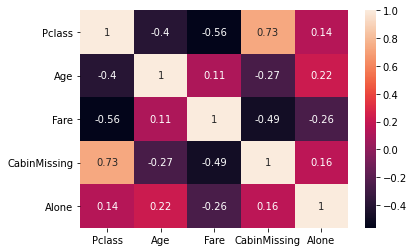

In [28]:
corrMatrix = train_data[features].corr()
sns.heatmap(corrMatrix, annot=True)


Extract dummy variables for random forest model.

In [29]:
y = train_data["Survived"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features]) 

Run logistic regression to understand effects of different variables

In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X, y)
predictions = logreg.predict(X_test).astype(int)
#look at score
log_score = round(logreg.score(X, y) * 100, 2)
log_score

82.38

Look at coefficients from logistic regression model

In [31]:
coefficients  = pd.DataFrame(X.columns.delete(0))
coefficients.columns = ['Feature']
coefficients["Correlation"] = pd.Series(logreg.coef_[0])
coefficients.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,Title_Miss,1.283369
5,Sex_male,0.960202
4,Sex_female,0.639913
10,Title_Other,0.639128
12,Embarked_Q,0.258996
13,Embarked_S,0.101510
2,CabinMissing,-0.000954
1,Fare,-0.026468
8,Title_Mr,-0.192206
3,Alone,-0.665535


Run grid search to tune hyperparameters

In [32]:
#function to return best score, best parameters for hyparameters tuning
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))
from sklearn.model_selection import GridSearchCV
#run grid search
#rf = RandomForestClassifier(random_state=123)
#param_grid = {'max_depth': [5, 10, 50],
 #             'criterion':['gini', 'entropy'],
  #            'n_estimators': [100, 200, 500, 1000],
   #           'min_samples_split': [2,4,6]}

#grid_search_model = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = 0, n_jobs = -1)
#best_rf_model= grid_search_model.fit(X, y)
#clf_performance(best_rf_model,'Random Forest')

Run best random forest model based on grid search

In [33]:
##model
model = RandomForestClassifier(random_state = 1, max_depth = 10, n_estimators = 100)
model.fit(X, y)                                                                                                                                                           
predictions = model.predict(X_test).astype(int)

Look at decision tree score on training data

In [34]:
training_score = round(model.score(X,y) * 100, 2)
training_score

95.29

Run cross validation test for random forest model.

In [35]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model,X, y,cv=5)
print(cv)
print(cv.mean())

[0.83798883 0.79213483 0.83707865 0.78089888 0.82022472]
0.8136651810934655



Create output file and submit

In [36]:
##submission
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
